In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from utils import *
from rubin_sim.site_models import Almanac
from rubin_sim.utils import _angularSeparation

In [2]:
streak_width = 1.  # arcsec
const = starlink_constellation()

In [3]:
len(const)

30000

In [4]:
constellation = Constellation(const,  alt_limit=20.)

In [5]:
# maybe load up the almanac, then for each night generate 10 times
alm = Almanac()

In [6]:

# Define a delta-t of 30 seconds
delta_t = 30./3600./24.

for sat in constellation.sat_list:
    sat._epoch = alm.sunsets[10]['sunset'] - 15129

In [7]:
def calc_lengths(alt_rad1, az_rad1, alt_rad2, az_rad2, alt_limit=np.radians(20.)):
    
    # Be generous, demand both alts be above limit
    #above_limit = np.where((alt_rad1 > alt_limit) & (alt_rad2 > alt_limit))[0]
    # just demand that it start above limit. Things moving out should balance things moving in.
    above_limit = np.where((alt_rad1 > alt_limit))[0]
    lengths =  _angularSeparation(az_rad1[above_limit], alt_rad1[above_limit],
                                 az_rad2[above_limit], alt_rad2[above_limit])
    return lengths

In [8]:
alt_limit_20 = np.radians(20.)
alt_limit_30 = np.radians(30.)
alt_limit_80 = np.radians(80.)


mjd_result = []
lengths_20 = []
lengths_30 = []
lengths_80 = []
rel_time = []
nights = []


for i in np.arange(0,366,20):
    mjds = np.linspace(alm.sunsets[i]['sun_n12_setting'], alm.sunsets[i]['sun_n12_rising'], 11)

    
    for mjd in mjds:
        constellation.update_mjd(mjd)
        
        illum1 = np.where(constellation.eclip == False)[0]
        
        alt_rad1 = constellation.altitudes_rad + 0
        az_rad1 = constellation.azimuth_rad + 0
        

        constellation.update_mjd(mjd+delta_t)
        illum2 = np.where(constellation.eclip == False)[0]
        
        illum = np.unique(np.concatenate([illum1, illum2]))

        alt_rad2 = constellation.altitudes_rad[illum] + 0
        az_rad2 = constellation.azimuth_rad[illum] + 0
        
        alt_rad1 = alt_rad1[illum]
        az_rad1 = az_rad1[illum]

        lengths_20.append(np.sum(calc_lengths(alt_rad1, az_rad1, alt_rad2, az_rad2, alt_limit=alt_limit_20)))
        lengths_30.append(np.sum(calc_lengths(alt_rad1, az_rad1, alt_rad2, az_rad2, alt_limit=alt_limit_30)))
        lengths_80.append(np.sum(calc_lengths(alt_rad1, az_rad1, alt_rad2, az_rad2, alt_limit=alt_limit_80)))

    mjd_result.append(mjds)
    rel_time.append(mjds-np.mean(mjds))
    nights.append(mjds*0+i)

In [9]:
nights = np.concatenate(nights)
rel_time = np.concatenate(rel_time)
lengths_20 = np.array(lengths_20)
lengths_30 = np.array(lengths_30)
lengths_80 = np.array(lengths_80)

Text(0.5, 1.0, 'Altitude limit of 20 deg')

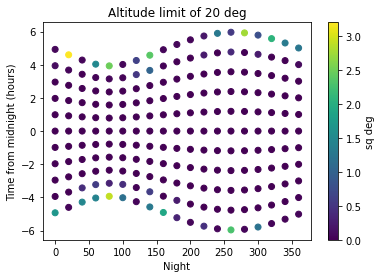

In [10]:
ack = plt.scatter(nights,rel_time*24,  c=np.degrees(lengths_20)*streak_width/3600.)
cb = plt.colorbar()
cb.set_label('sq deg')
plt.ylabel('Time from midnight (hours)')
plt.xlabel('Night')
plt.title('Altitude limit of 20 deg')

/Users/yoachim/anaconda3/envs/pycraf-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Altitude limit of 20 deg')

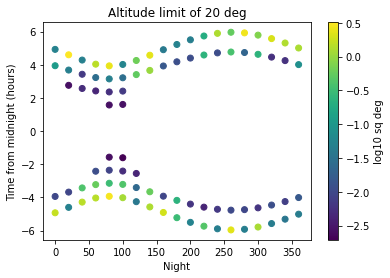

In [11]:
ack = plt.scatter(nights,rel_time*24,  c=np.log10(np.degrees(lengths_20)*streak_width/3600.))
cb = plt.colorbar()
cb.set_label('log10 sq deg')
plt.ylabel('Time from midnight (hours)')
plt.xlabel('Night')
plt.title('Altitude limit of 20 deg')

Text(0.5, 1.0, 'Altitude limit of 30 deg')

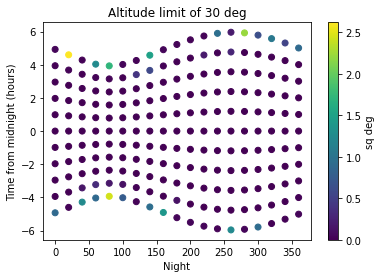

In [12]:
ack = plt.scatter(nights,rel_time*24,  c=np.degrees(lengths_30)*streak_width/3600.)
cb = plt.colorbar()
cb.set_label('sq deg')
plt.ylabel('Time from midnight (hours)')
plt.xlabel('Night')
plt.title('Altitude limit of 30 deg')

/Users/yoachim/anaconda3/envs/pycraf-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Altitude limit of 30 deg')

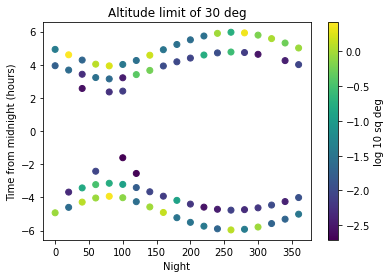

In [13]:
ack = plt.scatter(nights,rel_time*24,  c=np.log10(np.degrees(lengths_30)*streak_width/3600.))
cb = plt.colorbar()
cb.set_label('log 10 sq deg')
plt.ylabel('Time from midnight (hours)')
plt.xlabel('Night')
plt.title('Altitude limit of 30 deg')

Text(0.5, 1.0, 'Altitude limit of 80 deg')

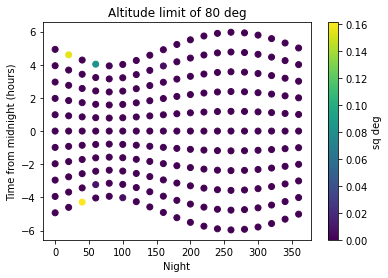

In [14]:
ack = plt.scatter(nights,rel_time*24,  c=np.degrees(lengths_80)*streak_width/3600.)
cb = plt.colorbar()
cb.set_label('sq deg')
plt.ylabel('Time from midnight (hours)')
plt.xlabel('Night')
plt.title('Altitude limit of 80 deg')

/Users/yoachim/anaconda3/envs/pycraf-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Altitude limit of 80 deg')

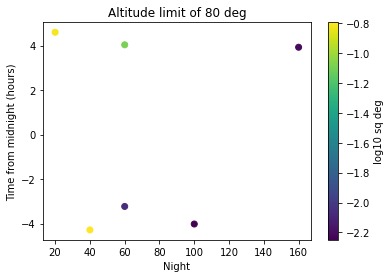

In [15]:
ack = plt.scatter(nights,rel_time*24,  c=np.log10(np.degrees(lengths_80)*streak_width/3600.))
cb = plt.colorbar()
cb.set_label('log10 sq deg')
plt.ylabel('Time from midnight (hours)')
plt.xlabel('Night')
plt.title('Altitude limit of 80 deg')

Text(0.5, 1.0, '20 < Altitude < 30')

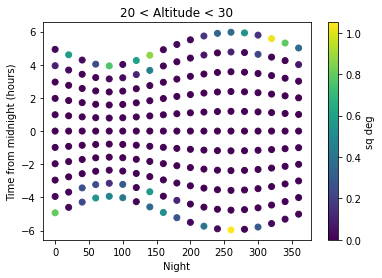

In [16]:
ack = plt.scatter(nights,rel_time*24,  c=np.degrees(lengths_20 - lengths_30)*streak_width/3600.)
cb = plt.colorbar()
cb.set_label('sq deg')
plt.ylabel('Time from midnight (hours)')
plt.xlabel('Night')
plt.title('20 < Altitude < 30')

In [17]:
print('constellation size=', len(const), ' satellites')
print('Streak width = %.1f arcsec' % streak_width)
print('Exposure time = %.1f s' % (delta_t*24*3600))

constellation size= 30000  satellites
Streak width = 1.0 arcsec
Exposure time = 30.0 s


In [18]:
print('Mean streak area 20 degree alt limit = %f sq deg' % np.mean(np.degrees(lengths_20)*streak_width/3600.))
print('Mean streak area 30 degree alt limit = %f sq deg' % np.mean(np.degrees(lengths_30)*streak_width/3600.))
print('Mean streak area 80 degree alt limit = %f sq deg' % np.mean(np.degrees(lengths_80)*streak_width/3600.))


Mean streak area 20 degree alt limit = 0.203971 sq deg
Mean streak area 30 degree alt limit = 0.130773 sq deg
Mean streak area 80 degree alt limit = 0.001997 sq deg


In [19]:
_temp = np.degrees(lengths_20 - lengths_30)*streak_width/3600.
print('Mean streak area between 20 and 30 degrees = %f sq deg' % np.mean(_temp))


Mean streak area between 20 and 30 degrees = 0.073198 sq deg
